# Case Study: Outlier Detection in Credit Card Fraud Detection Dataset

In this tutorial, we will demonstrate how to detect outliers in the **Credit Card Fraud Detection** dataset using various techniques. Outliers can have a significant impact on machine learning models, especially in fraud detection. We will explore several popular outlier detection methods and compare their effectiveness.

---

## Steps for Outlier Detection:

1. **Load the dataset.**
2. **Apply Z-score method for outlier detection.**
3. **Apply IQR (Interquartile Range) method for outlier detection.**
4. **Apply One-Class SVM method for outlier detection.**
5. **Apply Isolation Forest method for outlier detection.**
6. **Apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) method for outlier detection.**
7. **Apply LOF (Local Outlier Factor) method for outlier detection.**

---
## Step 1: Load the Dataset

First, we load the **Credit Card Fraud Detection** dataset, which consists of features representing transactions, most of which are legitimate, while a small portion represents fraudulent activities. The dataset includes the following features:

- **Time**: The number of seconds elapsed between this transaction and the first transaction.
- **V1, V2, ..., V28**: Principal component analysis (PCA)-generated features to ensure privacy.
- **Amount**: The amount of the transaction.
- **Class**: The target variable, where 1 represents fraud and 0 represents a legitimate transaction.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

In [4]:
# Step 1: Load the dataset
df = pd.read_csv('creditcard.csv')
df= df.sample(10000)
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

            Time        V1        V2        V3        V4        V5        V6  \
113237   72991.0  1.358951 -0.567543  0.054653 -0.420589 -0.995619 -1.073342   
38474    39404.0  1.260536 -0.746298  1.075411 -0.742653 -1.345531 -0.048076   
102429   68201.0  0.914197 -0.433517  1.061371  1.259881 -1.181079 -0.423294   
158806  111779.0 -1.795813  2.214610 -3.418380 -2.376719  2.746854  2.564576   
52821    45661.0 -0.829017  1.035355  1.378293  0.875899  0.520190  0.218262   

              V7        V8        V9  ...       V21       V22       V23  \
113237 -0.243629 -0.258580 -0.685574  ... -0.443623 -0.761809 -0.016477   
38474  -1.166740  0.184423 -0.730451  ...  0.482713  1.348336 -0.070931   
102429 -0.432544  0.058582  0.695243  ...  0.192026  0.239182 -0.123084   
158806  0.302830  1.521676  0.058499  ...  0.181767  0.668572 -0.038560   
52821   0.241354 -0.859176 -0.198413  ...  0.570163 -0.561737 -0.147906   

             V24       V25       V26       V27       V28  Amount  Cl

In [6]:
df['Class'].value_counts()

Class
0    9985
1      15
Name: count, dtype: int64

## Step 2: Apply Z-Score Method for Outlier Detection

The Z-score method calculates how many standard deviations away a data point is from the mean. Any point with a Z-score greater than 3 or less than -3 is considered an outlier.

Formula:
$$
Z = (X - \mu)/ \sigma
$$
 
Where:

* $X$ is the data point,
* $\mu$ is the mean of the dataset,
* $\sigma$ is the standard deviation of the dataset.

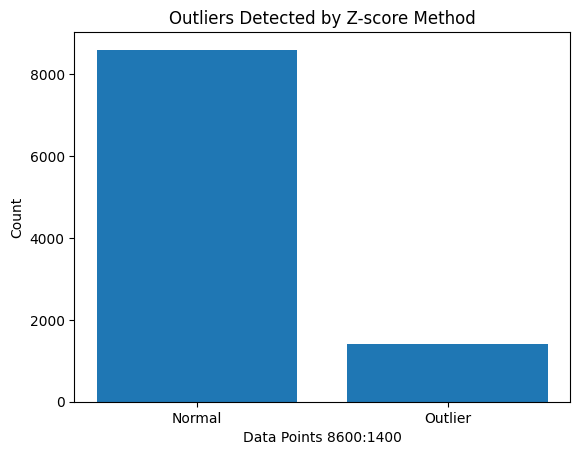

Class
0    1385
1      15
Name: count, dtype: int64

In [9]:
z_scores = np.abs((df - df.mean()) / df.std())
threshold = 3

# Identify the outliers based on the threshold
outliers_zscore = (z_scores > threshold).any(axis=1)

# Visualize the outliers detected by Z-score
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_zscore.sum(), outliers_zscore.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_zscore.sum()}:{outliers_zscore.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by Z-score Method')
plt.show()
df[outliers_zscore]['Class'].value_counts()

## Step 3: Apply IQR method for outlier detection.
The Interquartile Range (IQR) method detects outliers by identifying data points that lie outside the range defined by the lower and upper bounds:

Formula:
$$
Lower Bound = Q1 - 1.5 * IQR
$$

$$
Upper Bound = Q3 + 1.5 * IQR
$$

Where :
* $Q1$ is the first quartile
* $Q3$ is the third quartile
* $IQR = Q3 - Q1$

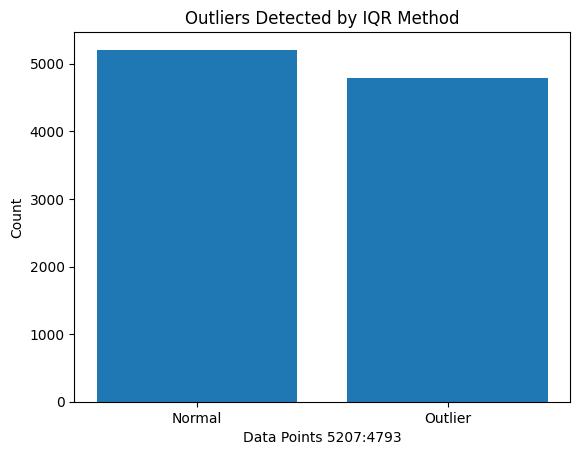

Class
0    4781
1      12
Name: count, dtype: int64

In [10]:
Q1 = df.drop('Class', axis=1).quantile(0.25)
Q3 = df.drop('Class', axis=1).quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers based on the lower and upper bounds
outliers_iqr = ((df.drop('Class', axis=1) < lower_bound) | (df.drop('Class', axis=1) > upper_bound)).any(axis=1)

# Visualize the outliers detected by IQR
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_iqr.sum(), outliers_iqr.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_iqr.sum()}:{outliers_iqr.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by IQR Method')
plt.show()
df[outliers_iqr]['Class'].value_counts()

##  Step 4: Apply One-Class SVM method for outlier detection.
**One-Class SVM (Support Vector Machine)** is an unsupervised algorithm that learns a boundary around the normal data points. Points that fall outside this boundary are considered outliers.

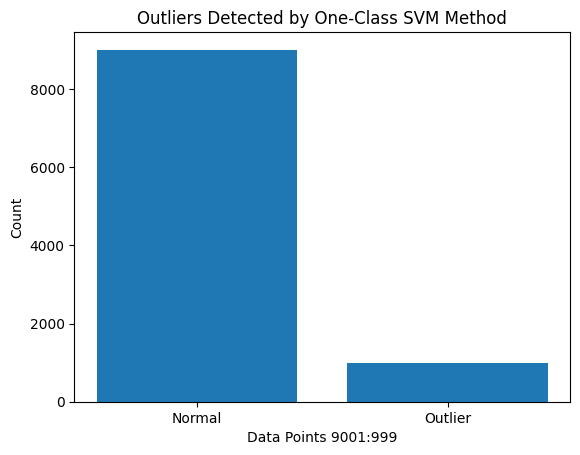

Class
0    997
1      2
Name: count, dtype: int64

In [11]:
df_svm = df.dropna()
ocsvm = OneClassSVM(nu=0.1)
outliers_ocsvm = ocsvm.fit_predict(df_svm.drop('Class', axis=1))

# Identify outliers based on the One-Class SVM predictions
outliers_ocsvm = outliers_ocsvm == -1

# Visualize the number of outliers detected by One-Class SVM method
plt.bar(['Normal', 'Outlier'], [len(df_svm) - outliers_ocsvm.sum(), outliers_ocsvm.sum()])
plt.xlabel(f'Data Points {len(df_svm) - outliers_ocsvm.sum()}:{outliers_ocsvm.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by One-Class SVM Method')
plt.show()
df[outliers_ocsvm]['Class'].value_counts()

## Step 5: Apply Isolation Forest method for outlier detection
**Isolation Forest** works by isolating observations by randomly selecting features and then randomly selecting split points. Anomalies are more likely to be isolated quickly because they are different from the majority of the data points.


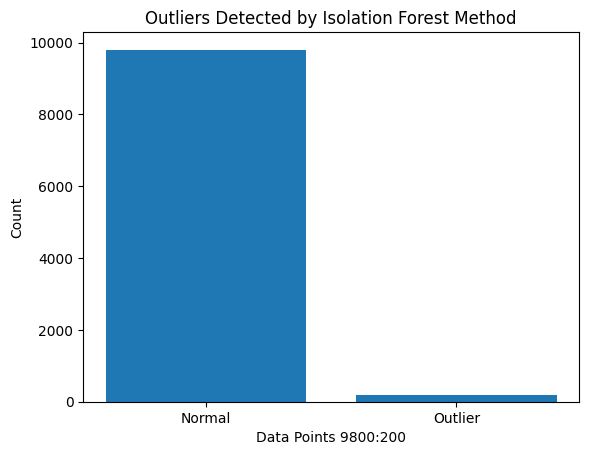

Class
0    191
1      9
Name: count, dtype: int64

In [12]:
isolation_forest = IsolationForest(contamination=0.02)
outliers_isolation_forest = isolation_forest.fit_predict(df.drop('Class', axis=1))

# Identify outliers based on the Isolation Forest predictions
outliers_isolation_forest = outliers_isolation_forest == -1

# Visualize the number of outliers detected by Isolation Forest method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_isolation_forest.sum(), outliers_isolation_forest.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_isolation_forest.sum()}:{outliers_isolation_forest.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by Isolation Forest Method')
plt.show()
df[outliers_isolation_forest]['Class'].value_counts()

## Step 6: Apply DBSCAN method for outlier detection.
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a clustering algorithm that identifies points that are in low-density regions as outliers (i.e., points that do not belong to any cluster).

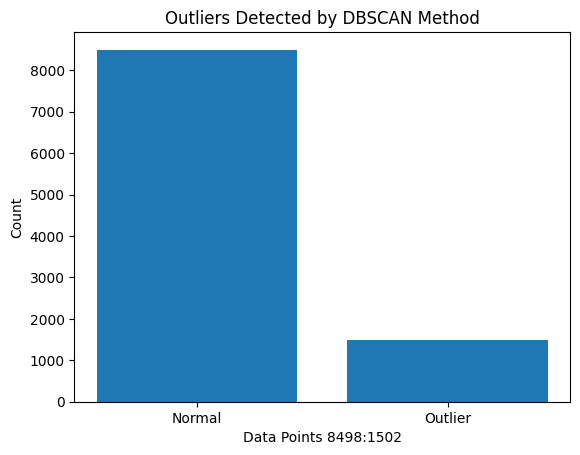

Class
0    1497
1       5
Name: count, dtype: int64

In [13]:
dbscan = DBSCAN(eps=100, min_samples=5)
outliers_dbscan = dbscan.fit_predict(df.drop('Class', axis=1))

# Identify outliers based on the DBSCAN clustering results
outliers_dbscan = outliers_dbscan == -1

# Visualize the number of outliers detected by DBSCAN method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_dbscan.sum(), outliers_dbscan.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_dbscan.sum()}:{outliers_dbscan.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by DBSCAN Method')
plt.show()
df[outliers_dbscan]['Class'].value_counts()

## Step 7: Apply LOF method for outlier detection.
**The Local Outlier Factor (LOF)** algorithm calculates the density of a data point compared to its neighbors. Points with significantly lower density are considered outliers.

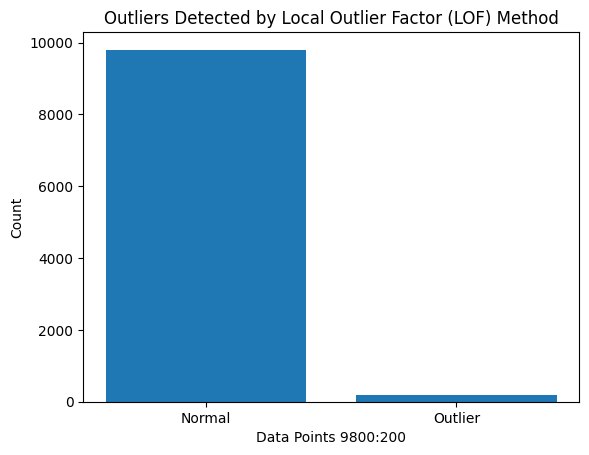

Class
0    199
1      1
Name: count, dtype: int64

In [14]:
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.02)
outliers_lof = lof.fit_predict(df.drop('Class', axis=1))

# Identify outliers based on the LOF scores
outliers_lof = outliers_lof == -1

# Visualize the number of outliers detected by LOF method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_lof.sum(), outliers_lof.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_lof.sum()}:{outliers_lof.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by Local Outlier Factor (LOF) Method')
plt.show()
df[outliers_lof]['Class'].value_counts()

## Conclusion
In this specific context, not every model works well!

That completes the tutorial for outlier detection using different methods on the "Credit Card Fraud Detection" dataset. You can compare the performances of each method and adjust the hyperparameters to fine-tune the outlier detection for your specific use case.